In [1]:
#Load data, and split into training and test

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris = load_iris()
X = iris.data
y = iris.target

print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model selection/Training to come next. 

Test proportion of 20% has been selected. May not be ideal for such small sample size, but will look out for overfitting.

In [4]:
# Initialise/run model. 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
# Check how model performs

y_pred = model.predict(X_test)

# Observe first five species in predictions and labels

print("Predictions:", y_pred[:5])
print("True Labels:", y_test[:5])

Predictions: [1 0 2 1 1]
True Labels: [1 0 2 1 1]


Joy

In [8]:
# Look at accuracy results as well as a confusion matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
cMatrix = confusion_matrix(y_test, y_pred)

print(accuracy)

print(cMatrix)

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


No predictions missed! Maybe a look at the tree to see what it came up with.

[Text(0.3076923076923077, 0.9285714285714286, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

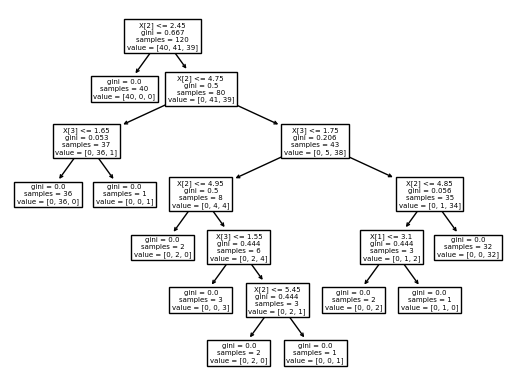

In [11]:
# Look at tree structure

from sklearn import tree

tree.plot_tree(model)

It is visible that the tree reached a terminal leaf quite early. This is due to the Satosa's characteristic of having a petal length of less than 2.45 cm. 

It appears to have taken a bit more time to discern between Versicolors and their Virginica counterparts (fairly so). These two are a little closer in similarity than the Satosa. 

The accuracy of this model, at 100% is a little alarming. A robust model is desired, hence a larger amount of data is suggested to be collected, with the possibility of trying other algorithms to explore how they perform. In the meantime, cross-validation to be carried out while awaiting further data.